In [8]:
import json
import matplotlib.pyplot as plt
import numpy as np
from pandas import json_normalize
from FCPython import createPitch
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [9]:
# Load competition file
with open('Statsbomb/data/competitions.json') as f:
    competitions = json.load(f)
    
# 16/17 Champions League ID
competition_id = 16

# Load matches file and get the 16/17 final 
with open('Statsbomb/data/matches/'+str(competition_id)+'/2.json') as f:
    matches = json.load(f)

# Print match results and match ID
match = matches[0]
home_team = match['home_team']['home_team_name']
away_team = match['away_team']['away_team_name']
home_score = match['home_score']
away_score = match['away_score']
description = 'The match between ' + home_team + ' and ' + away_team
result = ' finished ' + str(home_score) + ' : ' + str(away_score)
print(description + result)
match_id = match['match_id']
print(home_team + ' vs ' + away_team + ' has id:' + str(match_id))

The match between Juventus and Real Madrid finished 1 : 4
Juventus vs Real Madrid has id:18244


# Creating a Shot Map

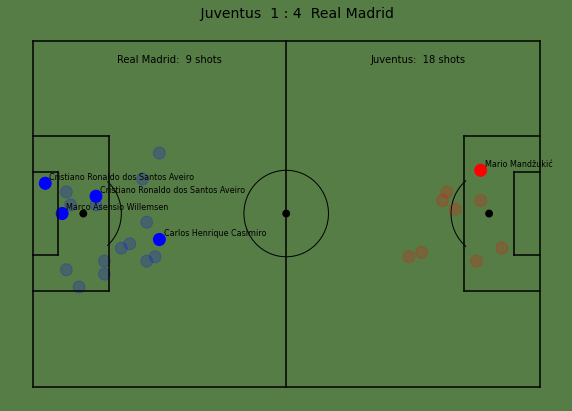

In [14]:
# Size of pitch in yards
pitchLength = 120
pitchWidth = 80

# Load in data
file_name = str(match_id) + '.json'
with open('Statsbomb/data/events/'+file_name) as data_file:
    data = json.load(data_file)

df = json_normalize(data, sep = '_')

# dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

# Draw the pitch
(fig,ax) = createPitch(pitchLength, pitchWidth, 'yards', 'black')

home_team_shots = 0
away_team_shots = 0

# Plot the shots
for i, shot in shots.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    
    goal = shot['shot_outcome_name'] == 'Goal'
    team_name = shot['team_name']
    
    circleSize = 1.4
    
    if (team_name == home_team):
        home_team_shots += 1
        if goal:            
            shotCircle = plt.Circle((x, pitchWidth-y), circleSize, color='red')
            plt.text((x+1), pitchWidth-y+1, shot['player_name'], fontsize=8)
        else:
            shotCircle = plt.Circle((x, pitchWidth-y), circleSize, color='red')
            shotCircle.set_alpha(.2)
    elif (team_name == away_team):
        away_team_shots += 1
        if goal:
            shotCircle = plt.Circle((pitchLength-x, y), circleSize, color="blue") 
            plt.text((pitchLength-x+1), y+1, shot['player_name'], fontsize=8) 
        else:
            shotCircle = plt.Circle((pitchLength-x, y), circleSize, color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)

plt.text(20,75,away_team + ':  ' + str(home_team_shots) + ' shots')
plt.text(80,75,home_team + ':  ' + str(away_team_shots) + ' shots')

fig.set_size_inches(10,7)
fig.set_facecolor('#567d46')
plt.title("     " + home_team + "  " + str(home_score) + " : " + str(away_score) + "  " + away_team, fontsize = 14)

#plt.savefig('shots.png', dpi=1200)
plt.show()

# Creating a Pass Map

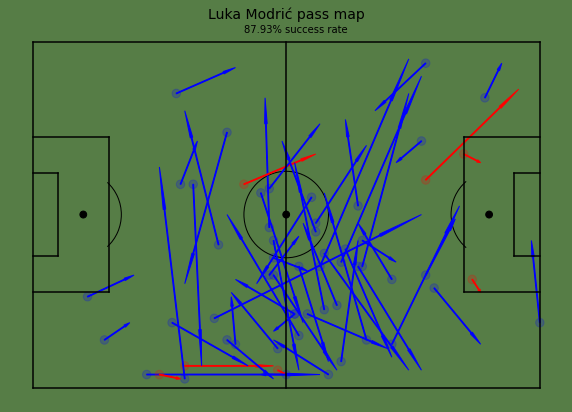

In [11]:
# Dataframe of passes
passes = df.loc[df['type_name'] == 'Pass'].set_index('id')

player = 'Luka Modrić'
total_passes = 0
sucessful_passes = 0

#Draw the pitch
(fig,ax) = createPitch(pitchLength, pitchWidth, 'yards', 'black')
for i,thepass in passes.iterrows():
    if thepass['player_name'] == player:
        x = thepass['location'][0]
        y = thepass['location'][1]
        
        incomplete_pass = thepass['pass_outcome_name'] == 'Incomplete' or thepass['pass_outcome_name'] == 'Interception'        
        
        if incomplete_pass:
            total_passes += 1
            passCircle = plt.Circle((x, pitchWidth-y), 1, color="red")      
            passCircle.set_alpha(.2)   
            ax.add_patch(passCircle)
            dx = thepass['pass_end_location'][0]-x
            dy = thepass['pass_end_location'][1]-y
            passArrow = plt.Arrow(x, pitchWidth-y ,dx, -dy, width=1, color="red")

        else:
            total_passes += 1
            sucessful_passes += 1
            passCircle = plt.Circle((x, pitchWidth-y), 1,color="blue")      
            passCircle.set_alpha(.2)   
            ax.add_patch(passCircle)
            dx = thepass['pass_end_location'][0]-x
            dy = thepass['pass_end_location'][1]-y
            passArrow=plt.Arrow(x, pitchWidth-y, dx, -dy, width=1, color="blue")
        ax.add_patch(passArrow)

fig.set_size_inches(10, 7)
fig.set_facecolor('#567d46')

success_rate = float("{:.2f}".format(sucessful_passes / total_passes * 100))
plt.text(50, 82,str(success_rate) + '% success rate')

plt.title(player + ' pass map', fontsize=14)

#plt.savefig('passes.png', dpi=1200) 
plt.show()